In [1]:
%matplotlib inline
### Interactive medword testing tool ###

import medword_pipeline
import embedding_fasttext
import embedding_word2vec
import shared.load_config 
import json
import pylab
import os
import model_validation as mv
import preprocess as pp

Using TensorFlow backend.


In [2]:
### define filepaths and names ###
#
# Note: the embedding model must fit the embedding_method in 
#       the config file ("word2vec" or "fasttext")
# 

# where to get the configuration file corresponding to the embedding model
config_data_dir = ''
config_filename = 'configuration.json'


# where to get the trained embedding model
emb_model_dir = 'data/embeddings/'
emb_model_filename = 'emb_model_2806_ft.bin'


# Load configuration (don't change)
config_src = os.path.join(config_data_dir, config_filename)
config = shared.load_config.Configuration(config_src)

In [3]:
### initialize embedding object (don't change)
if config.config['embedding_method'] == 'fasttext':
    embedding = embedding_fasttext.EmbeddingFasttext(config)

elif config.config['embedding_method'] == 'word2vec':
    embedding = embedding_word2vec.EmbeddingWord2vec(config)

else:
    print('embedding_algorithm (in config) must be "fasttext" or "word2vec"')
    raise AttributeError

    
### Load model (don't change)
embedding.load_model(emb_model_dir, emb_model_filename)
print("Model loaded.")

Model loaded.


In [4]:
### Get model information ###
print("vocab size:", len(embedding.get_vocab()))
print("vector dim:", embedding.vec_dim())

vocab size: 22809
vector dim: 100


In [5]:
### Play with model ###

# define a word from which you like to see it's n-nearest neighbours 
# in the embedding space
word = 'arzt'
n_nearest_neighbours = 10

# check if word is in model vocab
print("word is in model vocab: ", word in embedding.get_vocab())

# create list of neighbours
embedding.most_similar_n(word, n_nearest_neighbours)

word is in model vocab:  True


[('arzt', 1.0),
 ('kurarzt', 0.8320469260215759),
 ('notarzt', 0.8091708421707153),
 ('badearzt', 0.8087326884269714),
 ('wundarzt', 0.7915420532226562),
 ('amtsarzt', 0.7872973084449768),
 ('hausarzt', 0.7842728495597839),
 ('telearzt', 0.7827932834625244),
 ('bezirksarzt', 0.7796375751495361),
 ('landarzt', 0.775183916091919)]

In [6]:
### Analogy

# embedding.analogy([positives], [negatives], topn)
embedding.analogy(['koenig', 'frau'], ['mann'], 10)

[('koenigin', 0.7447852492332458),
 ('koenigs', 0.668362021446228),
 ('koenigsfeld', 0.6180114150047302),
 ('russland', 0.5761436223983765),
 ('koenigsberger', 0.5667705535888672),
 ('holland', 0.5637938976287842),
 ('koeniglich', 0.5626555681228638),
 ('koenigreich', 0.5611275434494019),
 ('pakistan', 0.5577478408813477),
 ('koenigsberg', 0.5565550327301025)]

In [7]:
# Get a vector of a word
vec = embedding.word_vec('das')

print(vec[:10])

[ 0.01048696  0.10086755  0.25754917  0.43578893 -0.29070744 -0.3941167
  0.14763075  0.67320144 -0.30519983  0.03499269]


In [ ]:
### Validation of the embedding model ###

# where to get the validation data
config.config['val_data_dir'] = 'data/validation_data/'

# Choose DOESNTFIT test file from your validation folder
# note: - the doesntfit file has a 'question' on each line
#       - a 'question' is of the format 
#       
#         word_1 word_2 word_3 ... word_N word_not_fitting
#        
#         -> word_1 to word_N belong to a category but word_not_fitting doesn't
# 
#         Example question:
# 
#         Auto Motorrad Fahrrad Fußgänger
#
#
config.config['doesntfit_file'] = 'german_doesntfit1.txt'


# Choose SYNONYM test file from your validation folder
# note: - the synonym file has a 'question' on each line
#       - a 'question' is of the format 
#       
#         word_1 word_2 
#        
#         -> word_1 and word_N are synonyms
# 
#         Example question:
# 
#         Blutgerinnsel Thrombus
#
# 
config.config['synonyms_file'] = 'german_synonyms3.txt'


mv.validate_model(embedding, emb_model_dir, emb_model_filename)

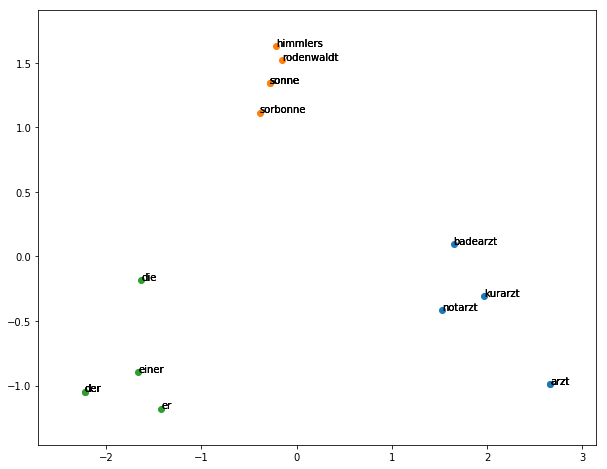

In [8]:
### Visualization ###
# From a list of words, plot all words and it's neighbours 

# define the words you would like to visualize
word_list = ['arzt', 'sonne', 'der']

# define the number of closest neighbors to display per word
n_nearest_neighbours = 4

# change figure size if desired
width = 10.0
height = 8.0
pylab.rcParams['figure.figsize'] = (width, height)

# plotting
mv.visualize_words(embedding, word_list, n_nearest_neighbours)

In [9]:
### test your used tokenizer ###

tokenizer = pp.get_tokenizer(config)
example = """!! „asdf“ 'asdf' abk. "asdf" ??Ein Arzt bzw. eine Ärztin ist ein medizinisch\n \n 
             ausgebildeter Heilkundiger, beschäftigt sich mit der
             Vorbeugung (Prävention), [Erkennung] (Diagnose),
             Behandlung (Therapie) [...] und Nachsorge von Krankheiten
             und Leiden bzw. gesundheitlichen Beeinträchtigungen,
             und stellt sich">
             damit in den Dienst der Gesundheit.
             
             stae-asdf"""
             
tk_example = tokenizer.tokenize(str(example))

print(tk_example)

['asdf', 'asdf', 'abk', 'asdf', 'ein', 'arzt', 'bzw', 'eine', 'aerztin', 'ist', 'ein', 'medizinisch', 'ausgebildeter', 'heilkundiger', 'beschaeftigt', 'sich', 'mit', 'der', 'vorbeugung', 'praevention', 'erkennung', 'diagnose', 'behandlung', 'therapie', 'und', 'nachsorge', 'von', 'krankheiten', 'und', 'leiden', 'bzw', 'gesundheitlichen', 'beeintraechtigungen', 'und', 'stellt', 'sich', 'damit', 'in', 'den', 'dienst', 'der', 'gesundheit', 'stae-asdf']
